In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

# Initial Examples

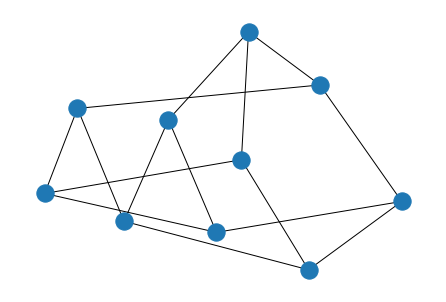

In [38]:
nx.draw(nx.petersen_graph())

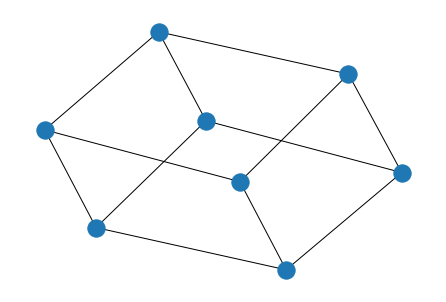

In [3]:
nx.draw(nx.hypercube_graph(3))

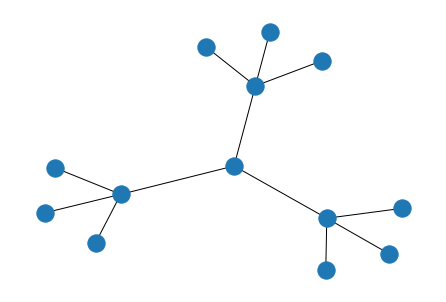

In [4]:
nx.draw(nx.balanced_tree(3,2))

Next is the toy example from the slides.

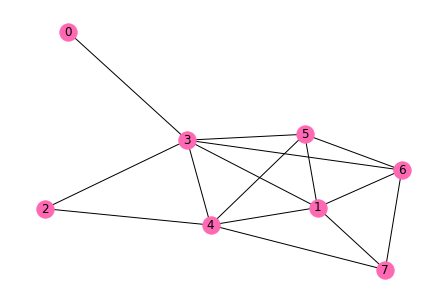

In [5]:
toy = nx.Graph()

toy.add_nodes_from([0,1,2,3,4,5,6,7])

toy.add_edges_from([(0,3),(1,3),(1,4),(1,5),(1,6),(1,7),(2,3),(2,4),(3,4),(3,5),(3,6),(4,5),(4,7),(5,6),(6,7)])

nx.draw(toy,with_labels='true',node_color='hotpink')

# Matrices
Here are the associated matrices for the toy graph. 

In [6]:
nx.adjacency_matrix(toy).todense()


matrix([[0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
        [0, 1, 0, 0, 1, 0, 1, 0]], dtype=int32)

In [7]:
nx.laplacian_matrix(toy).todense()


matrix([[ 1,  0,  0, -1,  0,  0,  0,  0],
        [ 0,  5,  0, -1, -1, -1, -1, -1],
        [ 0,  0,  2, -1, -1,  0,  0,  0],
        [-1, -1, -1,  6, -1, -1, -1,  0],
        [ 0, -1, -1, -1,  5, -1,  0, -1],
        [ 0, -1,  0, -1, -1,  4, -1,  0],
        [ 0, -1,  0, -1,  0, -1,  4, -1],
        [ 0, -1,  0,  0, -1,  0, -1,  3]], dtype=int32)

# Adjacency Matrix Results
One of our first results was that the entries in A^k count the walks of length k between each pair of nodes. Note that the diagonal of A^2 does recover the degrees. Below that we can see from the entries of A^3 that node 2 (remember the nodes are 0-indexed) lies on one triangle (2-3-4) and that there are three walks of length 3 from 0 to 1: 

* 0-3-4-1
* 0-3-5-1
* 0-3-6-1

In [24]:
np.diagonal((nx.adjacency_matrix(toy).todense())**2)


array([1, 5, 2, 6, 5, 4, 4, 3], dtype=int32)

In [9]:
(nx.adjacency_matrix(toy).todense())**3


matrix([[ 0,  3,  1,  6,  3,  3,  2,  3],
        [ 3, 14,  6, 17, 15, 14, 13, 11],
        [ 1,  6,  2,  9,  8,  5,  6,  4],
        [ 6, 17,  9, 12, 16, 14, 15,  8],
        [ 3, 15,  8, 16, 10, 15,  9, 12],
        [ 3, 14,  5, 14, 15, 10, 13,  7],
        [ 2, 13,  6, 15,  9, 13,  8, 11],
        [ 3, 11,  4,  8, 12,  7, 11,  4]], dtype=int32)

When we plot the spectrum of the adjacency matrix we see both positive and negative eigenvalues but we can verify that the leading eigenvalue lies between the minimum and maximum degrees (1 < 3.75 <  lambda_1 < 6) and that there is a positive Perron-Frobenius eigenvector corresponding to the lambda_1. 

The toy example has distinct eigenvalues, so the diameter is definitely smaller than this but if we look at the hypercube graph we see that the inequality is tight. 

lambda_1=  4.283441959591185


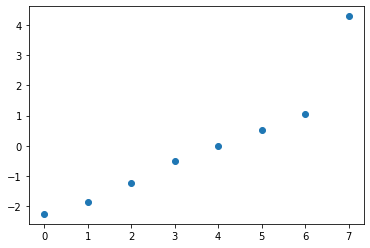

In [49]:
plt.plot(np.linalg.eigh((nx.adjacency_matrix(toy).todense()))[0],'o')
print('lambda_1= ',np.linalg.eigh((nx.adjacency_matrix(toy).todense()))[0][-1])

In [51]:
np.linalg.eigh((nx.adjacency_matrix(toy).todense()))[1][:,-1]

matrix([[-0.10523895],
        [-0.44697278],
        [-0.2022497 ],
        [-0.45078492],
        [-0.41553994],
        [-0.39258638],
        [-0.36832331],
        [-0.28734743]])

4


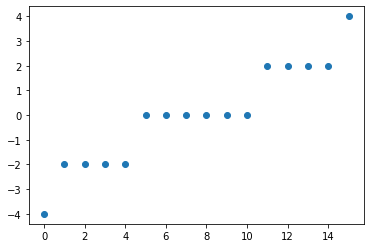

In [25]:
print(nx.diameter(nx.hypercube_graph(4)))
plt.plot(np.linalg.eigh((nx.adjacency_matrix(nx.hypercube_graph(4)).todense()))[0],'o')


I didn't prove this in the slides but there is a neat result due to Wilf (https://www2.math.upenn.edu/~wilf/website/Eigenvalues%20of%20a%20graph.pdf) that the chromatic number of a graph bounded above by 1 + \lambda_1. The coloring below shows that the chromatic number of the Petersen graph attains this bound, as well as the generally weaker bound 1+ \Delta. It is a fun exercise to prove this result or to try to give an algorithm that guarantees such a coloring exists. 

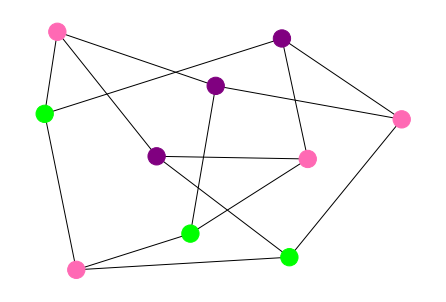

In [37]:
gp = nx.petersen_graph()
gp.nodes()[0]['color'] = 'hotpink'
gp.nodes()[1]['color'] = 'lime'
gp.nodes()[4]['color'] = 'lime'
gp.nodes()[5]['color'] = 'lime'
gp.nodes()[2]['color'] = 'hotpink'
gp.nodes()[6]['color'] = 'purple'
gp.nodes()[3]['color'] = 'purple'
gp.nodes()[8]['color'] = 'hotpink'
gp.nodes()[7]['color'] = 'purple'
gp.nodes()[9]['color'] = 'hotpink'

nx.draw(gp,node_color = [gp.nodes()[x]['color'] for x in gp.nodes()])

In [28]:
np.linalg.eigh((nx.adjacency_matrix(nx.petersen_graph()).todense()))[0]

array([-2., -2., -2., -2.,  1.,  1.,  1.,  1.,  1.,  3.])

# Laplacian
When we switch over to the Laplacian we see that the spectrum is non-negative and that the all ones vector is indeed an eigenvector corresponding to 0. Up to rounding, we also can check that Kirchoff's tree theorem works for our graph. 

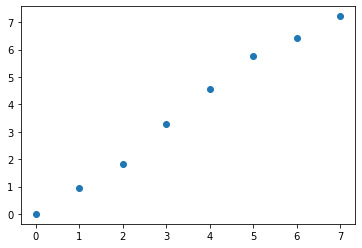

In [15]:
plt.plot(np.linalg.eigh((nx.laplacian_matrix(toy).todense()))[0],'o')

In [16]:
np.dot(nx.laplacian_matrix(toy).todense(),np.ones((8,1)))

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [17]:
(1/8)*np.product([x for x in np.linalg.eigh((nx.laplacian_matrix(toy).todense()))[0] if x>.00000001])

870.9999999999998

In [18]:
np.linalg.det(nx.laplacian_matrix(toy).todense()[1:,1:])

871.0000000000001

# Eigencentrality
If you look back up at the leading eigenvector of the toy graph, you'll see that the values correspond to the eigenvector centrality solution returned by networkx. 

In [19]:
nx.eigenvector_centrality(toy)


{0: 0.10523952900167408,
 1: 0.44697237459165906,
 2: 0.20225051723904325,
 3: 0.450785524704978,
 4: 0.41554018813441973,
 5: 0.39258629245208454,
 6: 0.3683227782581993,
 7: 0.28734676424225714}

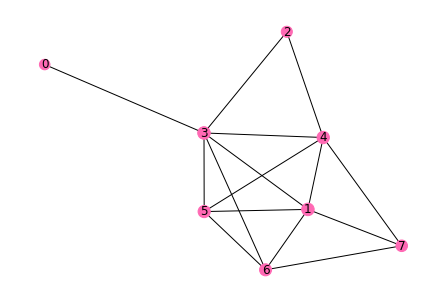

In [20]:
nx.draw(toy,with_labels='true',node_color='hotpink',node_size = [100*math.exp(nx.eigenvector_centrality(toy)[x]) for x in toy.nodes()])

# Spectral Clustering

The actual minimal cut is given by separating node 0 from node 3 but that isn't really an interesting partition. The version returned from the Fiedler vector isn't that exciting either but the other notebook on clustering looks at some more relevant examples. 

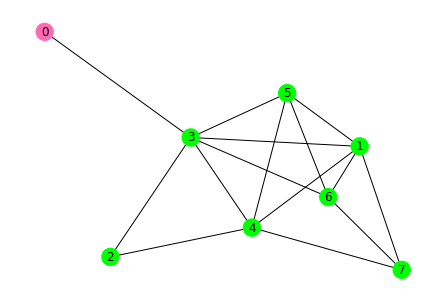

In [42]:
toy.nodes()[0]['color'] = 'hotpink'
for node in range(1,8):
    toy.nodes()[node]['color'] = 'lime'
    
nx.draw(toy, node_color = [toy.nodes()[x]['color'] for x in toy.nodes()],with_labels=True)

In [57]:
np.linalg.eigh(nx.laplacian_matrix(toy).todense())[1][:,1]

matrix([[ 0.91565576],
        [-0.16050212],
        [-0.10642431],
        [ 0.03834218],
        [-0.1492229 ],
        [-0.14289729],
        [-0.16329271],
        [-0.23165863]])

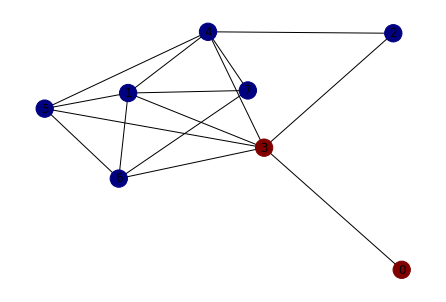

In [62]:
nx.draw(toy, node_color = [np.linalg.eigh(nx.laplacian_matrix(toy).todense())[1][:,1][x] >0 for x in toy.nodes()],with_labels=True,cmap='jet')